ANOVA (ANalysis Of VAriance; 분산 분석)은 여러 그룹간의 평균의 차이가 통계적으로 유의미 한지를 판단하기 위한 시험법입니다. T-test 처럼 말이죠. 하지만 그룹의 수가 2개 이상일때 사용한다는 점이 다른점이죠.

분산분석에는 다음과 같은 3가지의 조건이 필요해요.

 - 정규성 : 각각의 그룹에서 변인은 정규분포.
 - 분산의 동질성 : Y의 모집단 분산은 각각의 모집단에서 동일.
 - 관찰의 독립성: 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집.  
 
파이썬에서 분산분석을 사용하기 위한 라이브러리를 불러오는 코드부터 실행하겠습니다.

In [3]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 분산(variance)의 중요함
아래의 두개의 그림을 통해 분산에 대해 알아 보겠습니다. 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보이는것을 알 수 있죠.

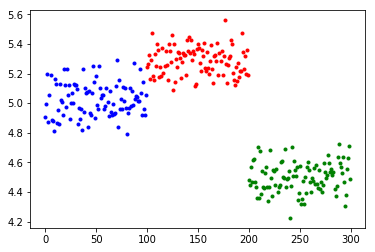

In [2]:
centers = [5,5.3,4.5]
std = 0.1
colors = 'brg'

data_1 = []
for i in range(3):
    data_1.append(stats.norm(centers[i], std).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_1[0]),data_1[i], '.', color = colors[i])

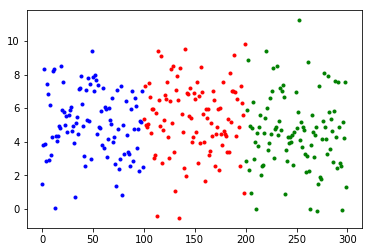

In [5]:
std_2 = 2
data_2 = []
for i in range(3):
    data_2.append(stats.norm(centers[i], std_2).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_2[0]), data_2[i], '.', color = colors[i])

분산이 클수록 집단의 평균값의 차이가 무의미해집니다.

이것을 통해 두가지를 알 수 있는데요. 1. 집단 평균값 의 분산이 클수록 그리고, 2. 집단 내 분산이 작아질수록 평균의 차이가 분명해집니다.

집단 간 분산과 집단 내 분산 이 두가지를 이용해 분석을 하기에 분산분석이라고 합니다.

분산분석에는 여러 종류가 있지만, 여기서는 일원분산분석(One-way ANOVA)과 이원분산분석(Two-way ANOVA)를 알아보겠습니다.

### 일원분산분석(One-way ANOVA)
종속변인은 1개이며, 독립변인의 집단도 1개인 경우입니다. 한가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용됩니다.

파이썬에서 One-way ANOVA 분석은 scipy.stats이나 statsmodel 라이브러리를 이용해서 할 수 있습니다.

statsmodel 라이브러리가 좀 더 많고 규격화된 정보를 제공합니다.

### 예시 데이터(Altman 910) 설명
22명의 심장 우회 수술을 받은 환자를 다음의 3가지 그룹으로 나누었습니다.

- Group I: 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
- Group II: 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
- Group III: 아산화 질소 없이 오직 35-50%의 산소만 24시간동안 처리한 환자

그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정하였습니다.

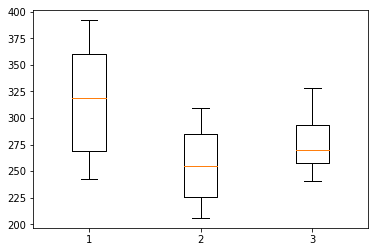

In [8]:
# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

Boxplot에서 볼 수 있듯이, 평균값의 차이가 실제로 의미가 있는 차이인지, 분산이 커서 그런것인지 애매한 상황입니다. 이런 상황에서 분산분석을 통해 통계적 유의성을 알아 볼 수 있습니다.

In [14]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


### Statsmodel을 사용한 일원분산분석

In [16]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(data, columns=['value', 'treatment'])    

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [26]:
df['value'].describe()

count     22.000000
mean     283.227273
std       51.284391
min      206.000000
25%      249.500000
50%      274.000000
75%      305.500000
max      392.000000
Name: value, dtype: float64

## 이원분산분석(two-way ANOVA)
독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용합니다. 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용됩니다.

### 예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다. 4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

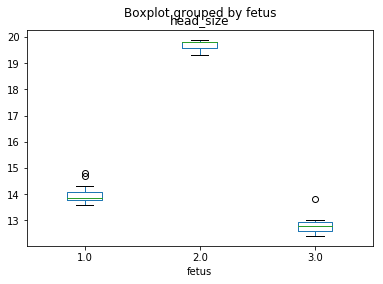

In [29]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
# df.tail()

# 태아별 머리 둘레 plot 만들기
df.boxplot(column = 'head_size', by='fetus' , grid = False)

그림을 보니 태아(fetus) 3명의 머리 둘레는 차이가 있어보입니다. 그런데 이것이 관측자와 상호작용이 있는것인지 분석을 통해 알아 보겠습니다.

### 분산분석으로 상관관계
statmodels 라이브러리를 사용해 간단하게 계산할 수 있습니다.

In [31]:
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


P-value 가 0.05 이상 입니다, 따라서 귀무가설을 기각할 수 없고. 측정자와 태아의 머리둘레값에는 연관성이 없다고 할 수 있습니다. 측정하는 사람이 달라도 머리 둘레값은 일정하는 것이죠.

결론적으로 초음파로 측정하는 태아의 머리둘레값은 믿을 수 있다는 것입니다.